# Mini Project 1

**2025 Introduction to Quantiative Methods in Finance**

**The Erdös Institute**

**Instructions** Use current stock data to create two potentially profitable investment portfolios. One that is higher risk and one that is lower risk.

-- You are to interpret and explain your interpretation of a high risk profile and low risk profile of a portfolio. You should provide some measurable quantitative data in your explanation.

# High-Risk Portfolio Summary
#### GME (GameStop): 
Highly speculative with sharp price swings driven more by hype than fundamentals. Known for extreme volatility due to retail trading interest.
#### PLTR (Palantir): 
A growth-stage tech company with a lot of potential but high valuation uncertainty. Sensitive to market sentiment and future expectations.
#### ABUS (Arbutus Biopharma): 
A biotech stock where price depends heavily on clinical trial outcomes. These companies often experience large moves based on news.
#### RIVN (Rivian): 
An electric vehicle company still in early development. Not yet consistently profitable and exposed to both production risk and competitive pressure.

These stocks have potential for large returns but also face significant uncertainty. Their prices can fluctuate sharply in short periods, which makes them suitable for a high-risk profile.

# Low-Risk Portfolio Summary
#### JNJ (Johnson & Johnson): 
A large, diversified healthcare company. Known for stability, consistent earnings, and steady dividend payments.
#### XEL (Xcel Energy): 
A utility provider offering electricity and gas. Utilities tend to have predictable cash flows and low volatility.
#### WMT (Walmart): 
A global retailer that sells everyday essentials. Performs steadily across economic cycles and benefits from consumer demand even in downturns.

These companies are well-established, operate in stable industries, and tend to have lower price volatility. Their consistent performance makes them a good fit for a low-risk portfolio.

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Define high-risk and low-risk stock groups along with S&P 500 as market benchmark
high_risk_tickers=['GME','PLTR','ABUS','RIVN']
low_risk_tickers=['JNJ','XEL','WMT']

market_ticker=['^GSPC']
tickers=high_risk_tickers+low_risk_tickers+market_ticker

# Download Adjusted Close prices
stock_data = yf.download(tickers, start="2023-06-22", end="2024-06-22")['Close']

# Drop any rows with missing values
stock_data = stock_data.dropna()



YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  8 of 8 completed


In [3]:
stock_data.head()

Ticker,ABUS,GME,JNJ,PLTR,RIVN,WMT,XEL,^GSPC
Date,,,,,,,,
2023-06-22,2.47,24.320000,155.525253,14.05,14.15,50.668884,58.417931,4381.890137
2023-06-23,2.41,23.700001,155.393784,14.03,13.53,50.574539,57.803593,4348.330078
2023-06-26,2.26,23.020000,153.656555,13.94,13.45,50.441158,58.511005,4328.819824
2023-06-27,2.24,23.580000,153.337280,14.61,13.94,50.258976,58.120068,4378.410156
2023-06-28,2.25,24.980000,153.027420,15.28,14.64,50.532246,57.003094,4376.859863


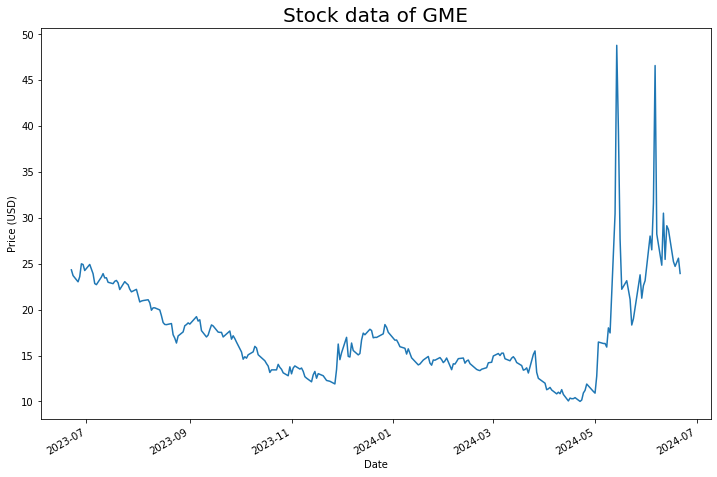

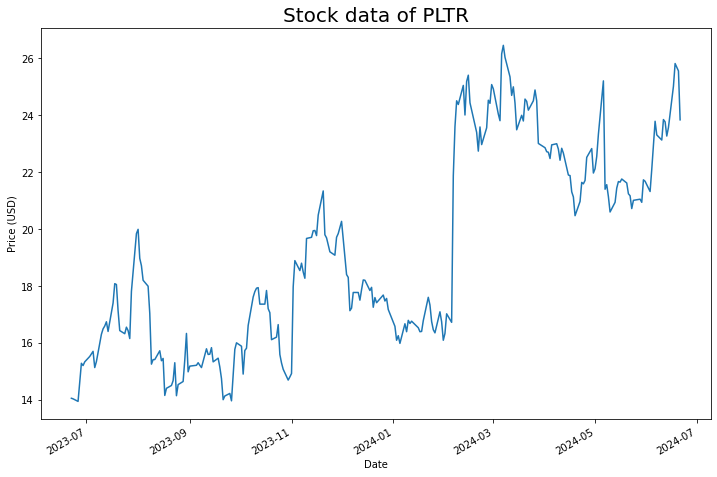

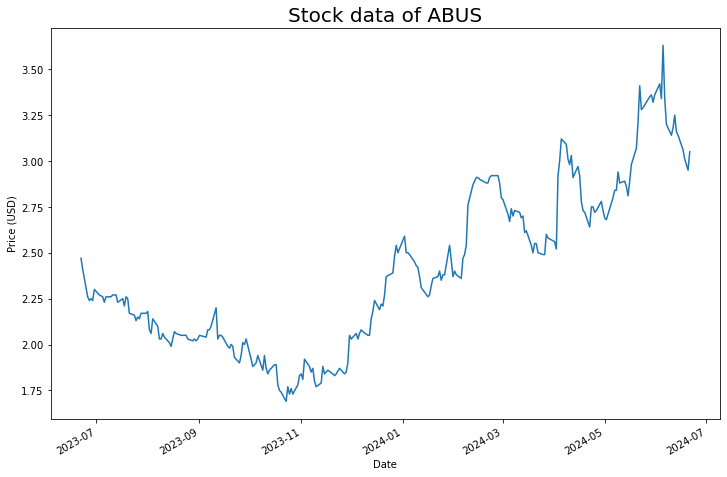

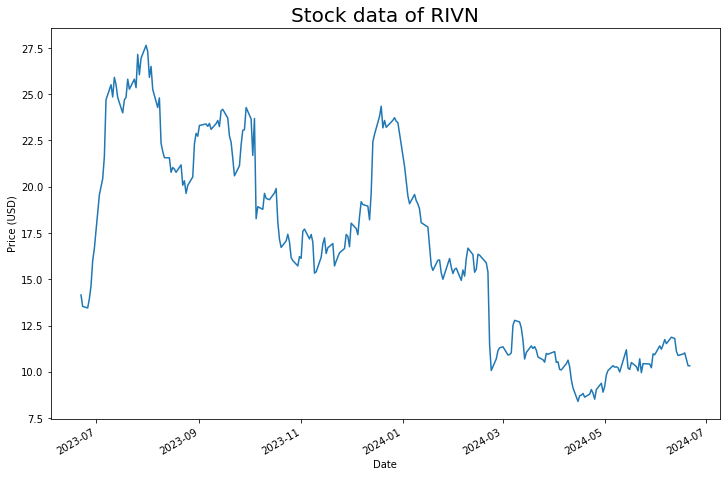

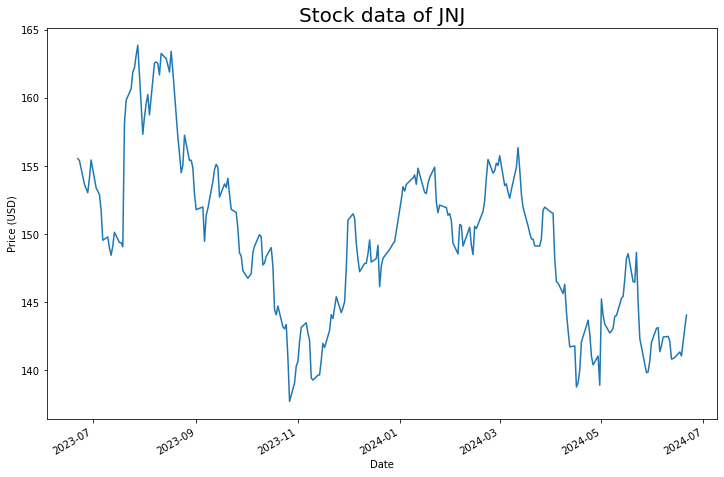

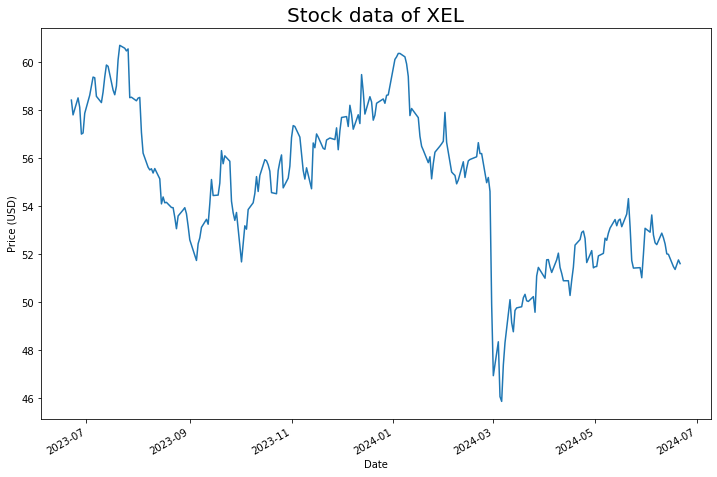

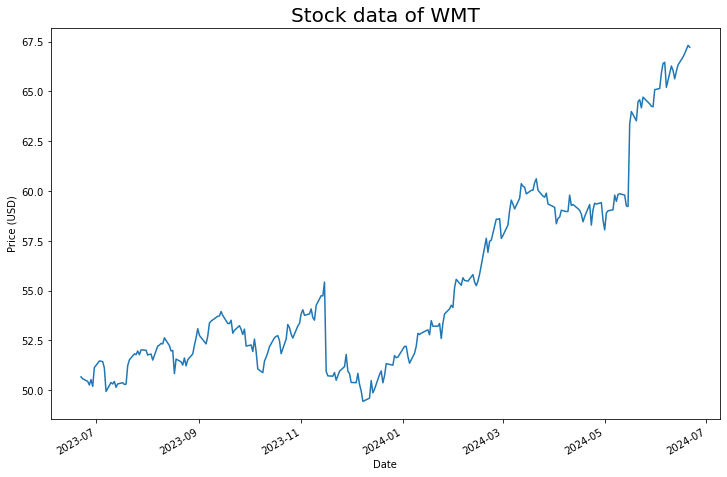

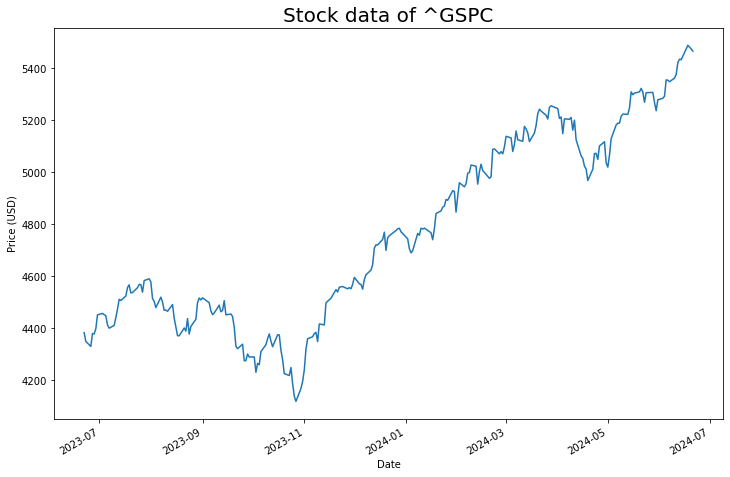

In [4]:
# Plot time series of each stock’s closing price to visualize trends and volatility

for ticker in tickers:
    
    stock_data[ticker].plot(figsize=(12,8))
    plt.title(f'Stock data of {ticker}', size=20)
    plt.ylabel('Price (USD)')
    plt.show()


In [5]:
# Daily log returns

log_returns = np.log(stock_data / stock_data.shift(1)).dropna()

In [6]:
log_returns.head(5)

Ticker,ABUS,GME,JNJ,PLTR,RIVN,WMT,XEL,^GSPC
Date,,,,,,,,
2023-06-23,-0.024591,-0.025824,-0.000846,-0.001425,-0.044805,-0.001864,-0.010572,-0.007688
2023-06-26,-0.064262,-0.029112,-0.011242,-0.006435,-0.005930,-0.002641,0.012164,-0.004497
2023-06-27,-0.008889,0.024035,-0.002080,0.046944,0.035783,-0.003618,-0.006704,0.011391
2023-06-28,0.004454,0.057677,-0.002023,0.044839,0.048995,0.005423,-0.019405,-0.000354
2023-06-29,-0.004454,-0.003208,0.006971,-0.005249,0.089456,-0.006783,0.000816,0.004464


In [7]:
# Daily mean return
mean_returns=log_returns.mean()
mean_returns


Ticker
ABUS     0.000840
GME     -0.000064
JNJ     -0.000305
PLTR     0.002107
RIVN    -0.001257
WMT      0.001126
XEL     -0.000493
^GSPC    0.000880
dtype: float64

In [8]:
#Annualized mean
annual_mean=mean_returns*252
annual_mean

Ticker
ABUS     0.211764
GME     -0.016231
JNJ     -0.076909
PLTR     0.530849
RIVN    -0.316888
WMT      0.283781
XEL     -0.124355
^GSPC    0.221694
dtype: float64

In [9]:
#Daily mean volatility
daily_volatility=log_returns.std()
daily_volatility

Ticker
ABUS     0.026510
GME      0.087411
JNJ      0.010157
PLTR     0.040027
RIVN     0.049065
WMT      0.010651
XEL      0.014081
^GSPC    0.007097
dtype: float64

In [10]:
# Annualized volatility
annual_volatility=daily_volatility*np.sqrt(252)
annual_volatility

Ticker
ABUS     0.420829
GME      1.387607
JNJ      0.161236
PLTR     0.635408
RIVN     0.778879
WMT      0.169084
XEL      0.223525
^GSPC    0.112657
dtype: float64

In [11]:
# Combine metrics(annual mean and volatility) into one summary DataFrame
summary = pd.DataFrame({
    'Annual Return': annual_mean,
    'Annual Volatility': annual_volatility
})

summary=summary.loc[tickers]

In [12]:
summary

,Annual Return,Annual Volatility
Ticker,,
GME,-0.016231,1.387607
PLTR,0.530849,0.635408
ABUS,0.211764,0.420829
RIVN,-0.316888,0.778879
JNJ,-0.076909,0.161236
XEL,-0.124355,0.223525
WMT,0.283781,0.169084
^GSPC,0.221694,0.112657


In [32]:
summary['Annual Volatility']['^GSPC']

0.11265703522099918

In [13]:
# Compare each stock’s volatility to the S&P 500 to assess relative risk
# Classify stocks into 'Higher Risk' vs 'Low/Moderate Risk' based on threshold

summary['Relative Volatility']=summary['Annual Volatility']/summary['Annual Volatility']['^GSPC']
summary['Interpretation'] = summary['Relative Volatility'].apply(
    lambda x: 'Higher Risk' if x > 2 else 'Low/Moderate Risk'
)

In [15]:
summary

,Annual Return,Annual Volatility,Relative Volatility,Interpretation
Ticker,,,,
GME,-0.016231,1.387607,12.317094,Higher Risk
PLTR,0.530849,0.635408,5.640202,Higher Risk
ABUS,0.211764,0.420829,3.735484,Higher Risk
RIVN,-0.316888,0.778879,6.913721,Higher Risk
JNJ,-0.076909,0.161236,1.431215,Low/Moderate Risk
XEL,-0.124355,0.223525,1.984120,Low/Moderate Risk
WMT,0.283781,0.169084,1.500872,Low/Moderate Risk
^GSPC,0.221694,0.112657,1.000000,Low/Moderate Risk


# How I Measured and Interpreted Risk

I used the standard deviation of daily returns to measure each stock’s volatility, higher volatility indicated higher risk.

To add context, I compared each stock’s volatility to that of the S&P 500.

Higher than market: considered more speculative
Closer to or below market: considered more stable
While not using Beta directly, this method gives similar insight into how much a stock moves relative to the market, useful for identifying risk exposure when building portfolios.

# Main Interpretation Summary:
Despite being considered “low-risk” stocks in public perception (e.g., JNJ, WMT, XEL), our analysis shows that:

- All selected stocks have higher annual volatility than the market level(S&P 500, with ~0.11 volatility).
- Even the least volatile stock in the group (JNJ, at ~0.16) still exceeds the market level.

This suggests:

### 1. Relative Risk is Still Elevated

Even stable companies can experience more price fluctuation than the diversified market index — particularly over short-to-medium-term periods.

### 2. Market Volatility Benchmark is Very Low

The S&P’s low volatility may be due to:
Diversification effects,etc

### 3. Risk Classification Is Relative

Low risk doesn’t mean zero volatility — just lower compared to highly volatile stocks like GME or PLTR. 

### Portfolio Risk Breakdown
Our analysis shows that even traditionally safe stocks (like JNJ, XEL, WMT) have volatility above market level, but the high-risk portfolio clearly stands apart with much greater deviation:

GME: ~12x market volatility

PLTR: ~5.6x

RIVN: ~6.9x

ABUS: ~3.7x

These elevated values confirm their classification as high-risk assets.

In contrast, the low-risk portfolio shows relative volatilities in the 1.4–2 range, which, while still above the market, are significantly more stable in comparison.

##### In this analysis, even our low-risk picks exceed market volatility, suggesting that truly low-risk investments may require broader diversification or more conservative asset classes.

# High-Risk Portfolio Weights (GME, PLTR, RIVN, ABUS):
GME: 17.49%
PLTR: 29.01%
RIVN: 24.64%
ABUS: 28.86%

# Low-Risk Portfolio Weights (JNJ, XEL, WMT):
JNJ: 30%
XEL: 30%
WMT: 40%


#### Compute annualized portfolio volatility using weighted covariance matrix. Compare high-risk vs low-risk portfolio risk levels

In [26]:
# Define portfolio weights
weights_high = np.array([0.1749, 0.2901, 0.2464, 0.2886])
weights_low = np.array([0.5, 0.1, 0.4])

#Log returns
returns_high= log_returns[high_risk_tickers]
returns_low=log_returns[low_risk_tickers]


In [27]:
# Calculate annualized covariance matrices for high-risk and low-risk portfolios
# Diagonal values = variance of each stock (its own volatility)
# Off-diagonal values = covariance between stocks (how they move together)

cov_high = returns_high.cov() * 252
cov_low = returns_low.cov() * 252


cov_high

Ticker,GME,PLTR,ABUS,RIVN
Ticker,,,,
GME,1.925454,0.155579,0.037759,0.239334
PLTR,0.155579,0.403744,0.039450,0.154568
ABUS,0.037759,0.039450,0.177097,0.052569
RIVN,0.239334,0.154568,0.052569,0.606653


In [29]:
cov_low


Ticker,JNJ,XEL,WMT
Ticker,,,
JNJ,0.025997,0.007668,0.003319
XEL,0.007668,0.049963,0.005564
WMT,0.003319,0.005564,0.028589


###  Interpretation of Covariance Matrices (Based on Results)

#### High-Risk Portfolio
- **GME** shows the highest variance (1.92), reflecting extreme individual volatility.
- Pairs like **GME–RIVN (0.2393)** and **PLTR–RIVN (0.1546)** have strong **positive covariance** — these stocks tend to move in the **same direction**, compounding the risk.
- Even smaller values like **PLTR–ABUS (0.0395)** still indicate weak diversification.
- Conclusion: My high-risk portfolio is **highly sensitive to market movements** and lacks effective internal diversification.

#### Low-Risk Portfolio
- Individual variances (e.g., **WMT = 0.0286**, **JNJ = 0.0260**) are much lower, reflecting greater individual stability.
- Cross-stock covariances are all **small (e.g., JNJ–WMT = 0.0033)**, indicating weak relationships between stocks.
- This  offer **better diversification**. Since price movements in one stock have **less impact** on the others.
- Conclusion: The my low-risk portfolio is **more stable** and benefits from **lower correlation among its components**.

#### Correlation Insight
- If two stocks had a **perfect negative correlation (covariance → negative, ideally -1)**, they would move in exactly **opposite directions**.
- This is ideal for **hedging** or reducing risk, because losses in one asset are offset by gains in another.
- In practice, perfect -1 correlation is **rare**. However, aiming for **low or slightly negative covariance** still improves **portfolio stability**.

####  Final Takeaway
- The high-risk portfolio exhibits **strong co-movement and volatility**, making it vulnerable to market swings.
- The low-risk portfolio demonstrates **weaker interdependence and lower variance**, which creates a more stable investment profile.
- **Diversification is effective** when assets are not highly positively correlated — or even better, **negatively correlated**.

#### Final Insight & Future Exploration Goal
In real-world portfolio construction, the ideal is to combine assets that do not move tightly together.
This project showed that lower off-diagonal covariance results in better risk distribution — a principle at the heart of diversification.
If I had more time, I would explore portfolios with assets showing low or negative covariance, to test whether this further reduces volatility and enhances long-term stability — especially during market downturns.


In [30]:
# Calculate portfolio volatility
vol_high = np.sqrt(np.dot(weights_high.T, np.dot(cov_high, weights_high)))
vol_low = np.sqrt(np.dot(weights_low.T, np.dot(cov_low, weights_low)))


In [31]:
print(f"Annualized Volatility - High Risk Portfolio: {vol_high:.4f}")
print(f"Annualized Volatility - Low Risk Portfolio: {vol_low:.4f}")

Annualized Volatility - High Risk Portfolio: 0.4862
Annualized Volatility - Low Risk Portfolio: 0.1188


#### The high-risk portfolio shows significantly greater annualized volatility (0.49) compared to the low-risk portfolio (0.12), confirming that the selected high-risk stocks are much more volatile and sensitive to market movements, while the low-risk portfolio maintains relative stability.

# Mini Project 2

**2025 Introduction to Quantiative Methods in Finance**

**The Erdös Institute**


###  Hypothesis Testing of Standard Assumptions Theoretical Financial Mathematics

In the theory of mathematical finance, it is common to assume the log returns of a stock/index are normally distributed.


Investigate if the log returns of stocks or indexes of your choosing are normally distributed. Some suggestions for exploration include:

    1) Test if there are period of times when the log-returns of a stock/index have evidence of normal distribution.
    
    2) Test if removing extremal return data creates a distribution with evidence of being normal.
    
    3) Create a personalized portfolio of stocks with historical log return data that is normally distributed.
    
    4) Test if the portfolio you created in the first mini-project has significant periods of time with evidence of normally distributed log returns.
    
    5) Gather x-number of historical stock data and just perform a normality test on their log return data to see if any of the stocks exhibit evidence of log returns that are normally distributed.

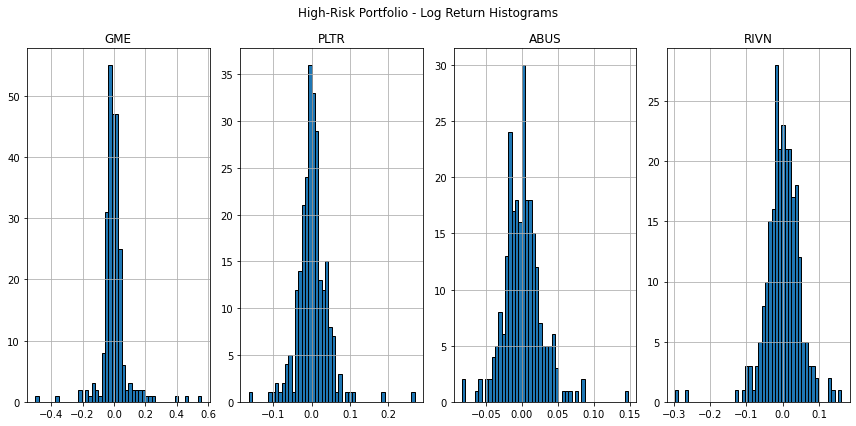

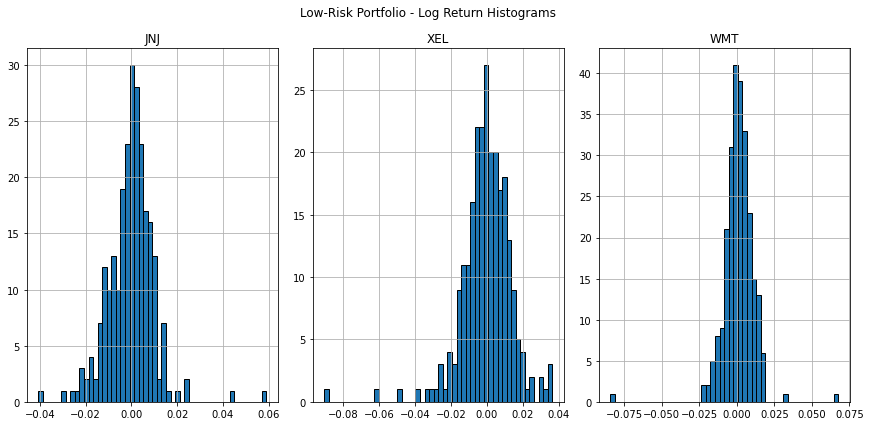

In [32]:
# Let's draw the histogram of our portfolios' log returns 
#to see the visually is it close to normal distribution

# Plot histograms for high-risk portfolio

returns_high.hist(bins=50, figsize=(12, 6), layout=(1, 4), edgecolor='black')
plt.suptitle("High-Risk Portfolio - Log Return Histograms")
plt.tight_layout()
plt.show()

# Plot histograms for low-risk portfolio

returns_low.hist(bins=50, figsize=(12, 6), layout=(1, 3), edgecolor='black')
plt.suptitle("Low-Risk Portfolio - Log Return Histograms")
plt.tight_layout()
plt.show()

In [33]:
from scipy.stats import shapiro

In [34]:
# Define function to apply Shapiro-Wilk normality test to each stock’s log returns

def test_normality(df):
    results = {}
    for col in df.columns:
        stat, p = shapiro(df[col].dropna())
        results[col] = {
            'Test Statistic': stat,
            'p-value': p,
            'Normal?': 'Yes' if p > 0.05 else 'No'
        }
    return pd.DataFrame(results).T

In [35]:
# Run the Shapiro-Wilk Test and 
# Test for normality across both high-risk and low-risk portfolios

shapiro_high = test_normality(returns_high)
shapiro_low = test_normality(returns_low)

print("High-Risk Portfolio Normality Test:")
print(shapiro_high)

print("\nLow-Risk Portfolio Normality Test:")
print(shapiro_low)

High-Risk Portfolio Normality Test:
     Test Statistic p-value Normal?
GME        0.724389     0.0      No
PLTR       0.889482     0.0      No
ABUS       0.949847     0.0      No
RIVN       0.909081     0.0      No

Low-Risk Portfolio Normality Test:
    Test Statistic p-value Normal?
JNJ        0.92552     0.0      No
XEL        0.91225     0.0      No
WMT       0.819731     0.0      No


In [42]:
# Removes outliers from a single stock’s return series using ±2 standard deviations from its own mean
# In a normal distribution, ~96% of values fall within ±2σ — this helps isolate extreme outliers without losing core data


def remove_outliers(series, threshold=2):
    mean = series.mean()
    print(mean)
    std = series.std()
    filtered= series[(series > mean - threshold*std) & (series < mean + threshold*std)]
    return filtered.dropna()



#### Outlier Removal Strategy

In our function `remove_outliers`, we remove data points beyond ±2 standard deviations from the **mean of each individual stock's returns**.

- This approach ensures that **outliers are detected relative to each stock’s own behavior**, not based on a combined or average threshold.
- For example, GME may have large return swings that are normal for it, while JNJ has much tighter return behavior. Applying the same rule globally would either:
  - Remove too many valid points from high-volatility stocks
  - Miss true outliers in low-volatility stocks


In [43]:
returns_high_lr_no_outliers = returns_high.apply(remove_outliers)

-6.44068919381878e-05
0.0021065435826392704
0.0008403323217623103
-0.0012574934926220512


In [44]:
returns_low_lr_no_outliers = returns_low.apply(remove_outliers)

-0.00030519309059096164
-0.0004934712684325394
0.0011261141081173151


In [45]:
returns_high_lr_no_outliers

Ticker,GME,PLTR,ABUS,RIVN
Date,,,,
2023-06-23,-0.025824,-0.001425,-0.024591,-0.044805
2023-06-26,-0.029112,-0.006435,NaN,-0.005930
2023-06-27,0.024035,0.046944,-0.008889,0.035783
2023-06-28,0.057677,0.044839,0.004454,0.048995
2023-06-29,-0.003208,-0.005249,-0.004454,0.089456
...,...,...,...,...
2024-06-14,-0.014528,0.012810,-0.006349,-0.020919
2024-06-17,-0.129260,0.059701,-0.025808,0.007326
2024-06-18,-0.020834,0.031474,-0.016475,0.005460


In [46]:
returns_low_lr_no_outliers

Ticker,JNJ,XEL,WMT
Date,,,
2023-06-23,-0.000846,-0.010572,-0.001864
2023-06-26,-0.011242,0.012164,-0.002641
2023-06-27,-0.002080,-0.006704,-0.003618
2023-06-28,-0.002023,-0.019405,0.005423
2023-06-29,0.006971,0.000816,-0.006783
...,...,...,...
2024-06-14,0.000619,-0.000409,0.004786
2024-06-17,0.002813,-0.009906,0.005951
2024-06-18,-0.002058,-0.002257,0.002666


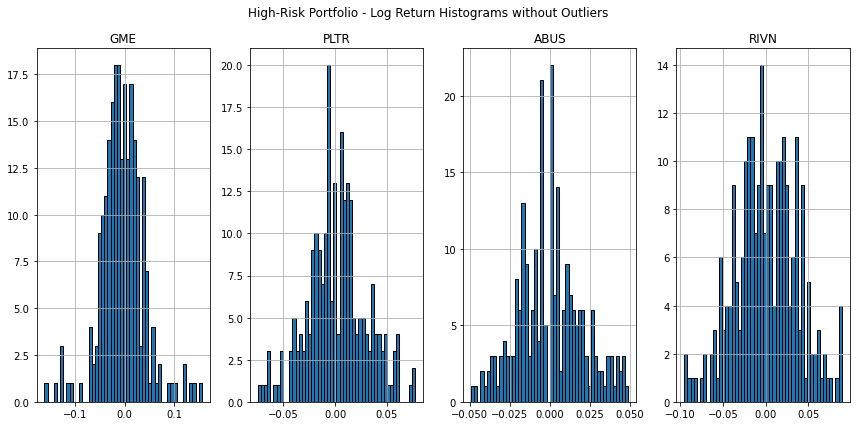

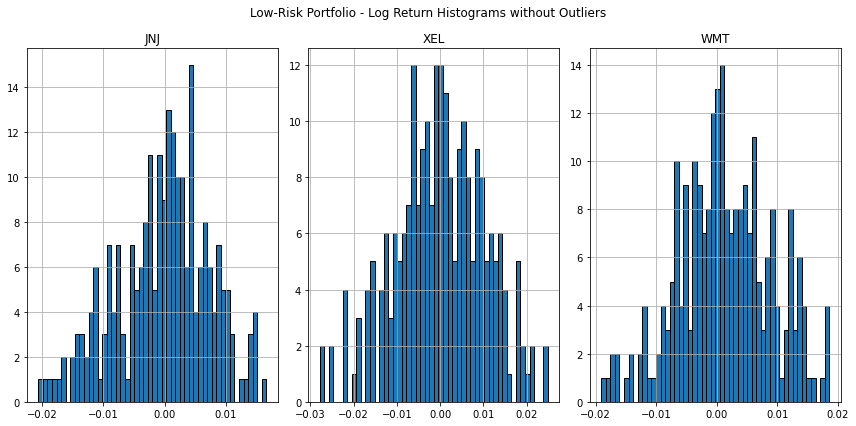

In [47]:
# Plot histograms for high-risk portfolio without outliers

returns_high_lr_no_outliers.hist(bins=50, figsize=(12, 6), layout=(1, 4), edgecolor='black')
plt.suptitle("High-Risk Portfolio - Log Return Histograms without Outliers")
plt.tight_layout()
plt.show()

# Plot histograms for low-risk portfolio without outliers

returns_low_lr_no_outliers.hist(bins=50, figsize=(12, 6), layout=(1, 3), edgecolor='black')
plt.suptitle("Low-Risk Portfolio - Log Return Histograms without Outliers")
plt.tight_layout()
plt.show()

In [48]:
# Re-test normality after outlier removal — many now pass the test

shapiro_high = test_normality(returns_high_lr_no_outliers)
shapiro_low = test_normality(returns_low_lr_no_outliers)

print("High-Risk Portfolio Normality Test without outliers:")
print(shapiro_high)

print("\nLow-Risk Portfolio Normality Test without outliers:")
print(shapiro_low)

High-Risk Portfolio Normality Test without outliers:
     Test Statistic   p-value Normal?
GME        0.952668  0.000001      No
PLTR       0.992375  0.251612     Yes
ABUS       0.990071  0.101408     Yes
RIVN       0.995717  0.745862     Yes

Low-Risk Portfolio Normality Test without outliers:
    Test Statistic   p-value Normal?
JNJ       0.986858  0.027143      No
XEL       0.995307  0.679301     Yes
WMT       0.992991  0.299898     Yes


# Conclusion from Normality Testing & Histograms
We began by applying the Shapiro-Wilk test on raw log return data for both high-risk and low-risk portfolios. Initially, none of the assets passed the normality test — this indicated the presence of outliers or heavy-tailed behavior, which is common in real market data.

To address this, we removed outliers defined as values beyond ±2 standard deviations from the mean. After removing these, we repeated both the visual histogram inspection and the Shapiro-Wilk test.

### Post-Outlier Observations:

Most assets began to resemble a normal distribution, with the majority of return values concentrated around the mean and forming a more symmetric shape.
Shapiro-Wilk test results after outlier removal:
High-Risk Portfolio: Only GME still fails the normality test.
Low-Risk Portfolio: Only JNJ still fails the test.

### Visual Confirmation:

The histograms for GME and JNJ show asymmetry: GME has more negative returns on the left (indicating left-skewness), while JNJ has more positive returns on the right (indicating right-skewness). This violates the symmetry assumption required for a normal distribution.

### Final Interpretation:
Real market data is rarely normally distributed in its raw form — outliers and extreme fluctuations are common.
However, after removing outliers, most assets do approximate a normal distribution, except in some inherently volatile or skewed stocks like GME and JNJ.


 ***

### Does the portfolio return pass the normality test even if some individual stocks didn’t?
### Does removing outliers change the result for the whole portfolio?
### What can you conclude about diversification's effect on return distribution?

In [49]:
# Combine returns using portfolio weights and test if portfolio-level returns are normal
# Calculate Weighted Portfolio Log Returns
portfolio_high_returns = returns_high.dot(weights_high)
portfolio_low_returns = returns_low.dot(weights_low)

# Perform Shapiro-Wilk Normality Test for Portfolio
portfolio_test_results = test_normality(
    pd.DataFrame({
        'High Risk Portfolio': portfolio_high_returns,
        'Low Risk Portfolio': portfolio_low_returns
    })
)



In [50]:
portfolio_test_results

,Test Statistic,p-value,Normal?
High Risk Portfolio,0.977516,0.000521,No
Low Risk Portfolio,0.950928,0.0,No


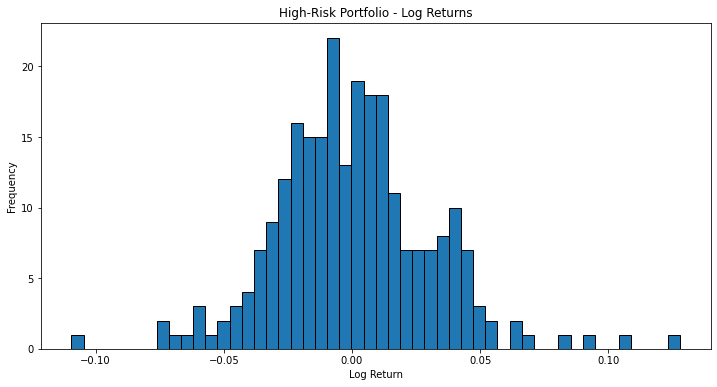

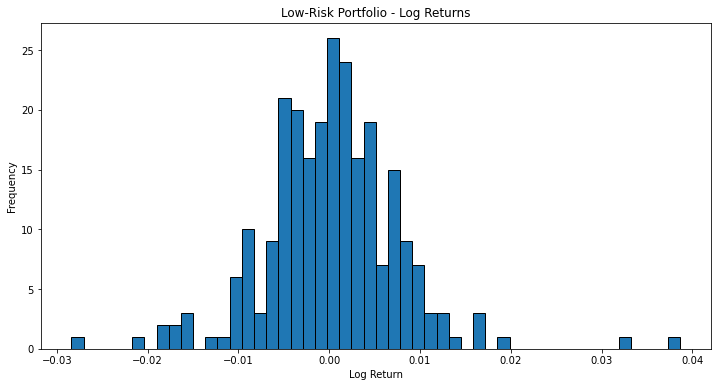

In [51]:
# High-Risk Portfolio

plt.figure(figsize=(12,6))
plt.hist(portfolio_high_returns, bins=50, edgecolor='k')
plt.title('High-Risk Portfolio - Log Returns')
plt.xlabel('Log Return')
plt.ylabel('Frequency')
plt.show()

# Low-Risk Portfolio
plt.figure(figsize=(12,6))
plt.hist(portfolio_low_returns, bins=50, edgecolor='k')
plt.title('Low-Risk Portfolio - Log Returns')
plt.xlabel('Log Return')
plt.ylabel('Frequency')


plt.show()

In [52]:
# Step 2: Calculate Weighted Portfolio Log Returns without Outliers
portfolio_high_returns = returns_high_lr_no_outliers.dot(weights_high)
portfolio_low_returns = returns_low_lr_no_outliers.dot(weights_low)

# Step 3: Perform Shapiro-Wilk Normality Test
portfolio_test_results = test_normality(
    pd.DataFrame({
        'High Risk Portfolio': portfolio_high_returns,
        'Low Risk Portfolio': portfolio_low_returns
    })
)
portfolio_test_results


,Test Statistic,p-value,Normal?
High Risk Portfolio,0.995778,0.840479,Yes
Low Risk Portfolio,0.99474,0.636785,Yes


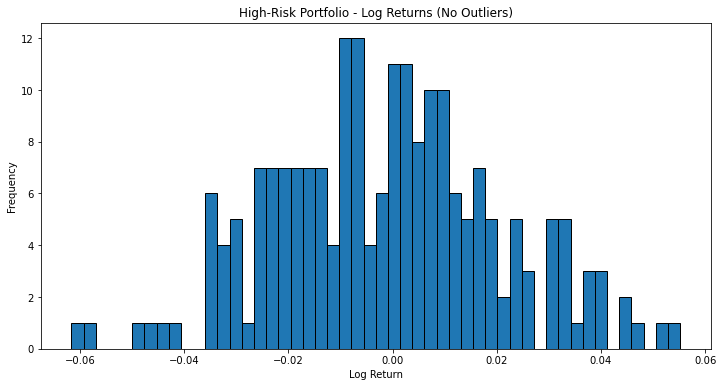

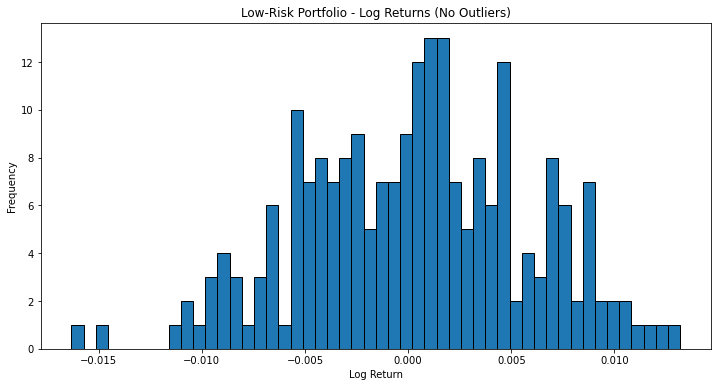

In [53]:
# High-Risk Portfolio

plt.figure(figsize=(12,6))
plt.hist(portfolio_high_returns, bins=50, edgecolor='k')
plt.title('High-Risk Portfolio - Log Returns (No Outliers)')
plt.xlabel('Log Return')
plt.ylabel('Frequency')
plt.show()

# Low-Risk Portfolio
plt.figure(figsize=(12,6))
plt.hist(portfolio_low_returns, bins=50, edgecolor='k')
plt.title('Low-Risk Portfolio - Log Returns (No Outliers)')
plt.xlabel('Log Return')
plt.ylabel('Frequency')


plt.show()

### Interpretation:
Just like with individual stocks, the portfolio-level returns also failed the normality test when outliers were included, despite being weighted combinations. But after removing outliers, both portfolios passed the normality test.